In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import torch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset

In [23]:
x_train = pd.read_parquet('/content/drive/MyDrive/Project/American Express Default/Dataset/x_train_adasyn.parquet')
x_test = pd.read_parquet('/content/drive/MyDrive/Project/American Express Default/Dataset/x_test_baseline.parquet')
y_train = pd.read_parquet('/content/drive/MyDrive/Project/American Express Default/Dataset/y_train_adasyn.parquet')
y_test = pd.read_csv('/content/drive/MyDrive/Project/American Express Default/Dataset/y_test.csv')

In [9]:
y_test1 = y_test["target"]
y_train1 = y_train["target"]

In [19]:
y_test1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 137674 entries, 0 to 137673
Series name: target
Non-Null Count   Dtype
--------------   -----
137674 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [20]:
y_train1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 396347 entries, 0 to 396346
Series name: target
Non-Null Count   Dtype
--------------   -----
396347 non-null  int64
dtypes: int64(1)
memory usage: 3.0 MB


Helper function for confusion matrix

In [10]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# empty dataframe for storing performance matrics
metrics = pd.DataFrame(np.zeros(shape = (5, 4)))
metrics.columns = ['models', 'accuracy', 'f1 score', 'precision']

In [12]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.9 MB/s eta 0:00:00


In [14]:
import shap

In [15]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.0 MB/s eta 0:00:00


In [16]:
pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 878.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 whi

In [17]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1) Random Forest Baseline

--------RF--------
Training time: 312.78 seconds
Correctly classified instances: 116664
Accuracy Score is 0.84739
Recall Score is 0.7367
Precision Score is 0.69318
F1 Score is 0.71428
       0      1
0  90402  11624
1   9386  26262
[[90402 11624]
 [ 9386 26262]]


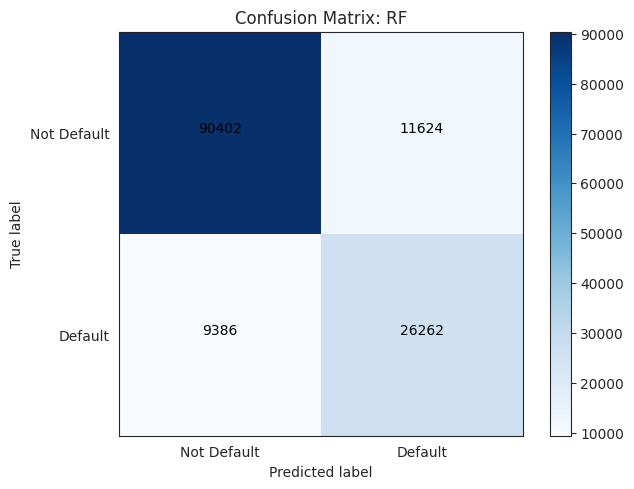

In [24]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
start_time = time.time()
rf_model.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict =rf_model.predict(x_test)
#print(y_predict)
#print(y_test_label)

print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: RF')

metrics.iloc[0,:] = ['RF',accuracy_score(y_test1, y_predict),
                     f1_score(y_test1, y_predict),
                     precision_score(y_test1,y_predict)]

ROC Score for Random Forest

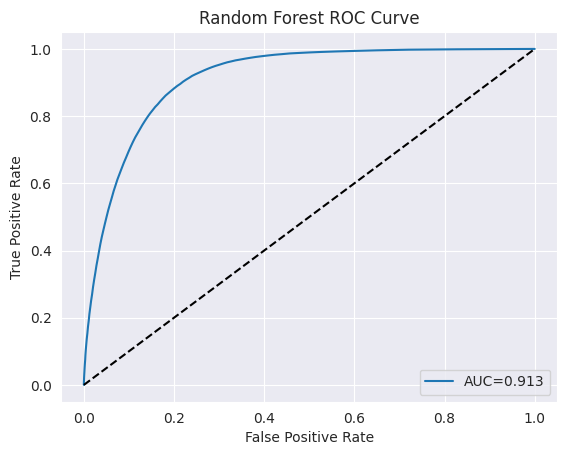

In [25]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = rf_model.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using Seaborn
sns.set_style('darkgrid')
sns.lineplot(x=fpr, y=tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for the Random Forest

    Feature  Importance
99      B_9    0.088130
83     B_10    0.082193
88      R_1    0.062180
4    B_38_2    0.032308
93      P_4    0.030322
74     D_51    0.027127
104    D_47    0.026739
79      S_5    0.026438
122    D_60    0.025913
55     B_19    0.024790


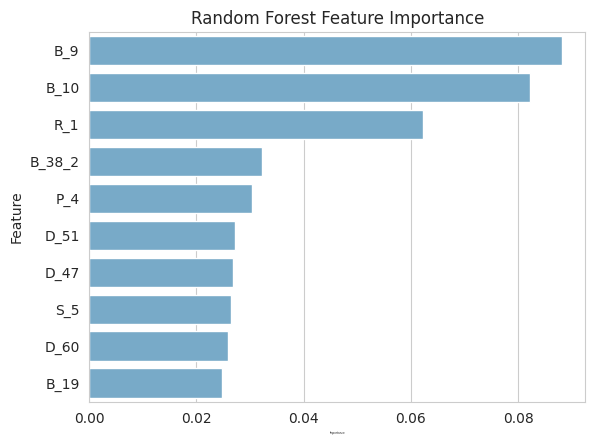

In [26]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = rf_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for the Random Forest

Permutation explainer: 201it [02:36,  1.23it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


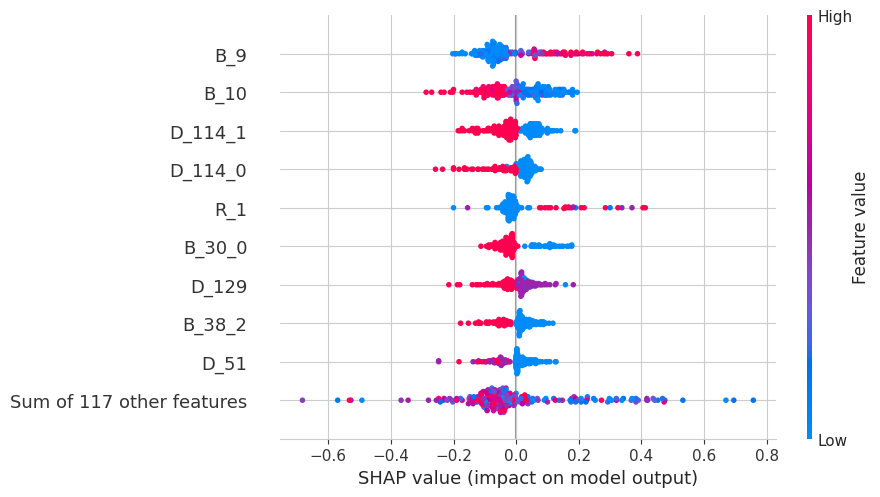

In [27]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(rf_model.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 2) LGBM

In [28]:
x_train.head(n = 5)

,B_30_0,B_30_1,B_30_2,B_38_1,B_38_2,B_38_3,B_38_4,B_38_5,B_38_6,B_38_7,...,R_17,R_3,Year,S_13,S_12,R_10,D_60,D_124,R_23,R_26
0,1,0,0,0,0,1,0,0,0,0,...,0,0,2017,290,0.192535,0,0.190317,5,0,-1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,2017,0,0.190811,0,0.005039,3,0,-1
2,1,0,0,0,0,1,0,0,0,0,...,0,2,2017,0,0.191670,0,0.606294,2,0,-1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,2018,290,0.189667,0,0.214078,6,0,-1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,2017,872,0.356928,0,0.982222,9,0,-1


--------LGBM--------


Using categorical_feature in Dataset.


Training time: 20.411 seconds
Correctly classified instances: 117259
Accuracy Score is 0.85171
Recall Score is 0.73163
Precision Score is 0.70625
F1 Score is 0.71871
       0      1
0  91178  10848
1   9567  26081
[[91178 10848]
 [ 9567 26081]]


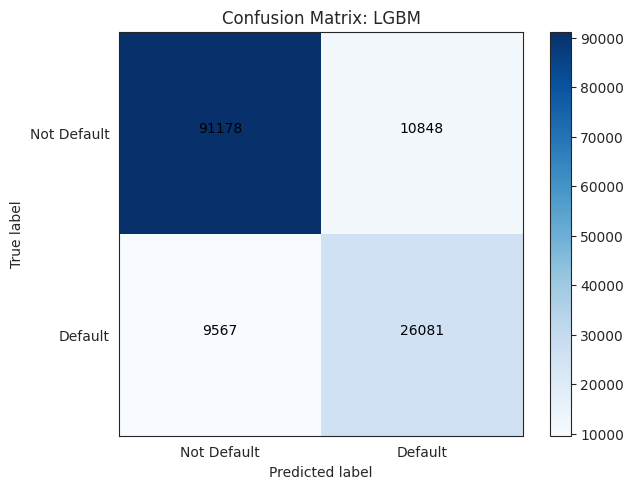

In [29]:
print("--------LGBM--------")
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier(random_state = 42)
cat_features = list(range(0, 50))
start_time = time.time()
lgbm_model.fit(x_train, y_train1,categorical_feature=cat_features)

# end tracking the training time and print the result
end_time = time.time()

y_predict = lgbm_model.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LGBM')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test1, y_predict),
                     f1_score(y_test1, y_predict),
                     precision_score(y_test1,y_predict)]

ROC Score for LGBM

Seaborn implementation is quite slow, we will use matplotlib instead.

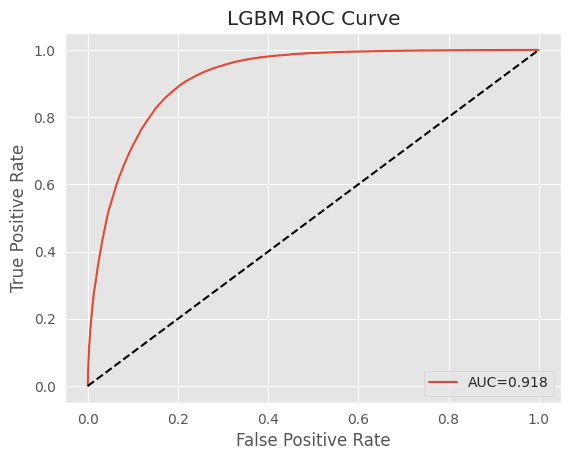

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = lgbm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test1, y_score)
roc_auc = auc(fpr, tpr)

# set the style of the plot
plt.style.use('ggplot')

plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for LGBM

    Feature  Importance
83     B_10         194
99      B_9         162
88      R_1         138
104    D_47         108
93      P_4          98
117     R_3          86
33   D_63_3          74
122    D_60          63
87      B_5          62
69     D_59          57


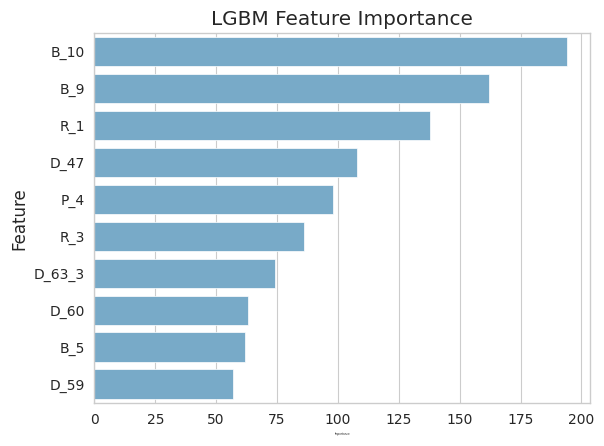

In [31]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = lgbm_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('LGBM Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot for LGBM

Permutation explainer: 201it [01:00,  2.78it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


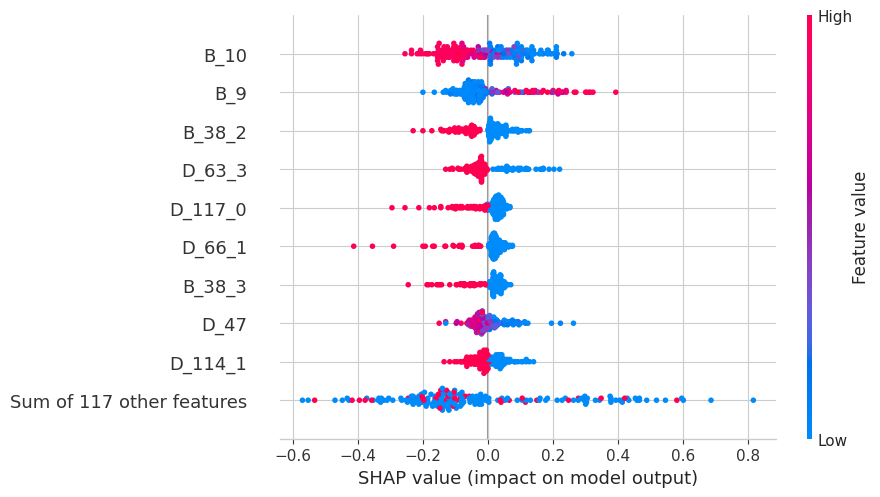

In [32]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(lgbm_model.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 3) XGBOOST

--------XGBoost--------
Training time: 512.67 seconds
Correctly classified instances: 117391
Accuracy Score is 0.85267
Recall Score is 0.72315
Precision Score is 0.71226
F1 Score is 0.71767
       0      1
0  91612  10414
1   9869  25779
[[91612 10414]
 [ 9869 25779]]


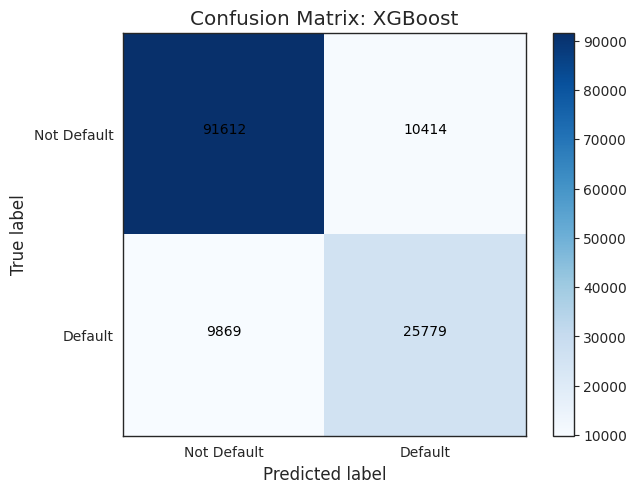

In [33]:
from xgboost import XGBClassifier
print("--------XGBoost--------")
xgb = XGBClassifier(booster = 'gbtree', seed = 42)
start_time = time.time()
xgb.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict = xgb.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: XGBoost')

ROC Curve for XGBOOST

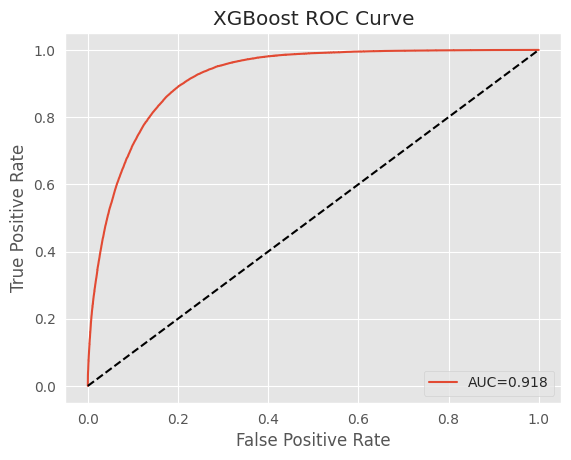

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = xgb.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# set the style of the plot
plt.style.use('ggplot')

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for XGBoost

      Feature  Importance
36    D_64_-1    0.080519
4      B_38_2    0.047106
74       D_51    0.043841
99        B_9    0.042745
11    D_114_0    0.037484
12    D_114_1    0.030230
40    D_66_-1    0.029953
110     D_129    0.029013
49     D_68_6    0.028310
10   D_114_-1    0.026893


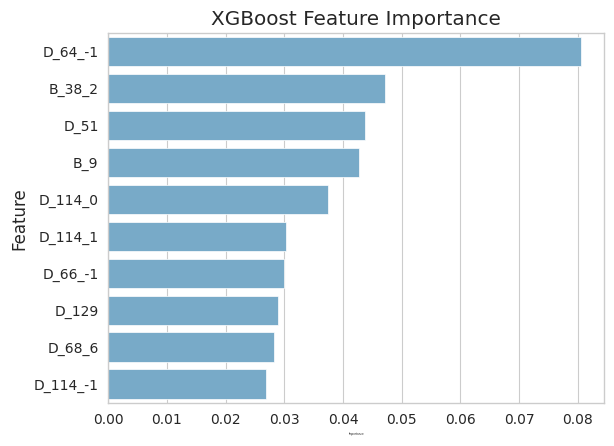

In [35]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = xgb.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for XGBoost

Permutation explainer: 201it [00:32,  4.39it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


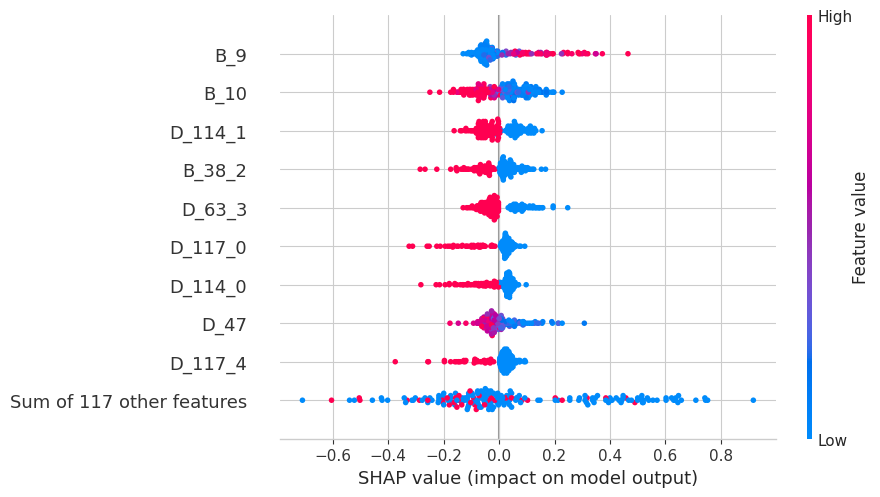

In [36]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(xgb.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 4) Catboost

--------CatBoost--------
Training time: 187.96 seconds
Correctly classified instances: 117783
Accuracy Score is 0.85552
Recall Score is 0.72035
Precision Score is 0.7213
F1 Score is 0.72082
       0      1
0  92104   9922
1   9969  25679
[[92104  9922]
 [ 9969 25679]]


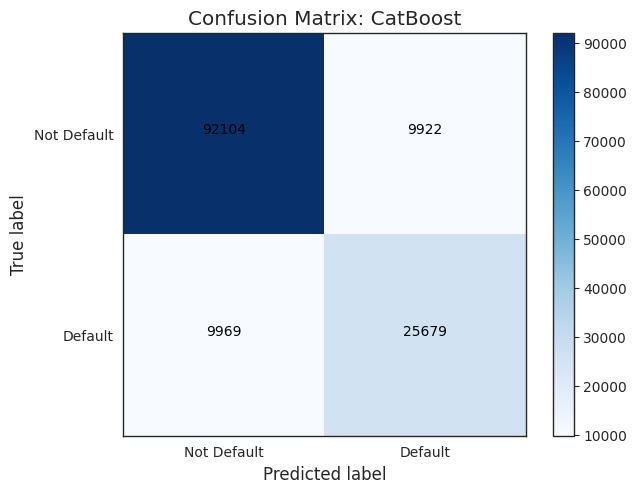

In [37]:
from catboost import CatBoostClassifier
print("--------CatBoost--------")
cat = CatBoostClassifier(random_seed=42, verbose=False)
start_time = time.time()
cat.fit(x_train, y_train1)
# end tracking the training time and print the result
end_time = time.time()

y_predict = cat.predict(x_test)
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_predict == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test1,y_predict)))

sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: CatBoost')

Roc curve

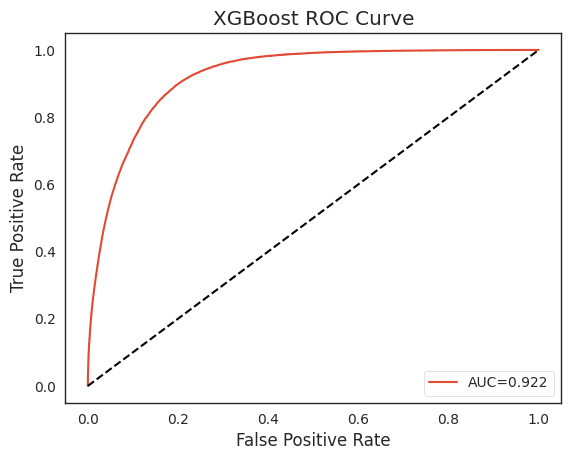

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = cat.predict_proba(x_test)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test1, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance

     Feature  Importance
12   D_114_1    8.840595
11   D_114_0    7.936964
93       P_4    6.719442
83      B_10    4.975134
30   D_126_2    4.715756
29   D_126_1    4.385524
88       R_1    4.306529
99       B_9    3.585520
25   D_120_0    3.130679
24  D_120_-1    3.101163


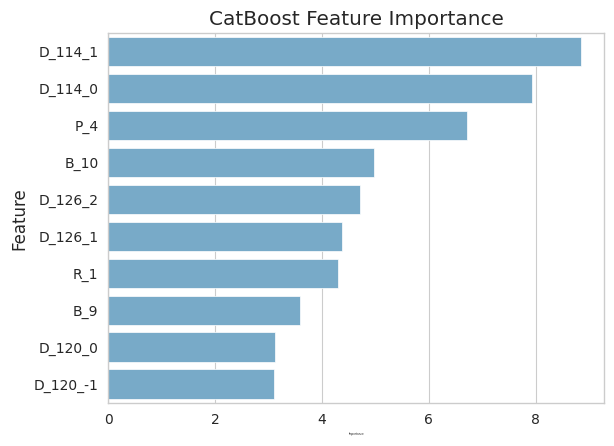

In [39]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = cat.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply plot for Catboost

Permutation explainer: 201it [00:34,  4.27it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


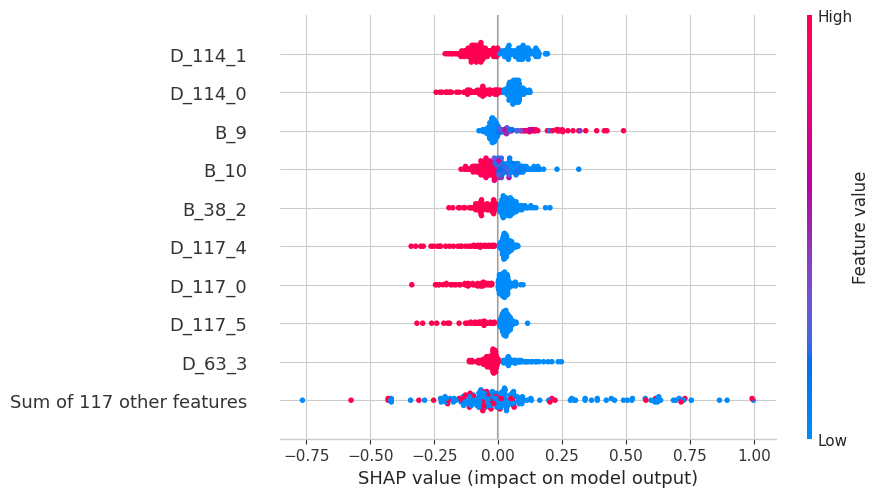

In [40]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test.shape[0], size=200, replace=False)
x_test_sample = x_test.iloc[sample_indices]

explainer = shap.Explainer(cat.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.plots.beeswarm(sv)

## 5) Tabnet

In [41]:
!pip install torch --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 993.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [42]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.


In [43]:
pip install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/nightly/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-tabnet 4.0 requires torch<2.0,>=1.2, but you have torch 2.0.0 which is incompatible.


In [44]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train1)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test1)

In [45]:
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


In [46]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# define the model
tabnet = TabNetClassifier()

# train the model
start_time = time.time()
tabnet.fit(
    X_train=x_train_np,
    y_train=y_train_np,
    eval_set=[(x_test_np, y_test_np)],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    eval_metric=['accuracy'],
    from_unsupervised=None,
)
end_time = time.time()

Device used : cpu


epoch 0  | loss: 0.3917  | val_0_accuracy: 0.75603 |  0:01:14s
epoch 1  | loss: 0.29481 | val_0_accuracy: 0.83986 |  0:02:00s
epoch 2  | loss: 0.2818  | val_0_accuracy: 0.84561 |  0:03:01s
epoch 3  | loss: 0.27776 | val_0_accuracy: 0.84266 |  0:03:50s
epoch 4  | loss: 0.27483 | val_0_accuracy: 0.84678 |  0:04:43s
epoch 5  | loss: 0.27527 | val_0_accuracy: 0.84691 |  0:05:29s
epoch 6  | loss: 0.27391 | val_0_accuracy: 0.84789 |  0:06:16s
epoch 7  | loss: 0.27029 | val_0_accuracy: 0.85107 |  0:07:10s
epoch 8  | loss: 0.26834 | val_0_accuracy: 0.8437  |  0:07:56s
epoch 9  | loss: 0.2684  | val_0_accuracy: 0.84289 |  0:08:42s
epoch 10 | loss: 0.26737 | val_0_accuracy: 0.84856 |  0:09:27s
epoch 11 | loss: 0.26699 | val_0_accuracy: 0.84923 |  0:10:14s
epoch 12 | loss: 0.26572 | val_0_accuracy: 0.84451 |  0:11:02s
epoch 13 | loss: 0.26485 | val_0_accuracy: 0.85037 |  0:11:50s
epoch 14 | loss: 0.26418 | val_0_accuracy: 0.84975 |  0:12:37s
epoch 15 | loss: 0.26501 | val_0_accuracy: 0.85058 |  0

Best weights from best epoch are automatically used!


--------Tabnet--------
Training time: 1002.7 seconds
Correctly classified instances: 117170
Accuracy Score is 0.85107
Recall Score is 0.68032
Precision Score is 0.72698
F1 Score is 0.70288
       0      1
0  92918   9108
1  11396  24252
[[92918  9108]
 [11396 24252]]


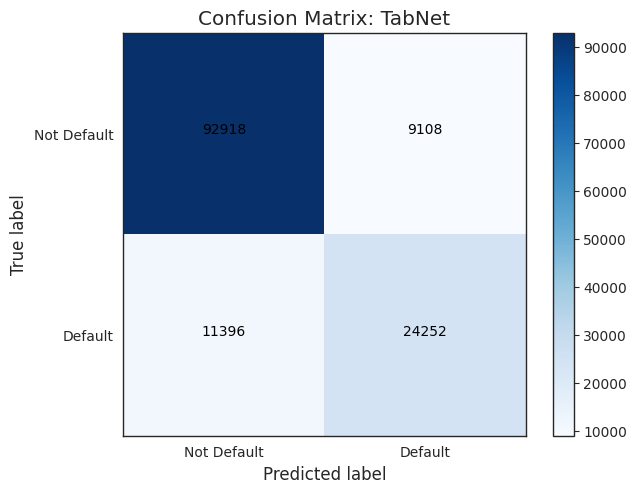

In [51]:
# make predictions on test set
y_pred = tabnet.predict(x_test_np)
print("--------Tabnet--------")

# print evaluation metrics
print('Training time: {:.5} seconds'.format(end_time - start_time))
print(f'Correctly classified instances: {sum(y_pred == y_test1)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test1, y_pred)))
print('Recall Score is {:.5}'.format(recall_score(y_test1, y_pred)))
print('Precision Score is {:.5}'.format(precision_score(y_test1, y_pred)))
print('F1 Score is {:.5}'.format(f1_score(y_test1, y_pred)))
print(pd.DataFrame(confusion_matrix(y_test1, y_pred)))

# plot confusion matrix
sns.set_style('white') 
class_names = ['Not Default','Default']
plot_confusion_matrix(confusion_matrix(y_test1,y_pred),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: TabNet')

Roc Score

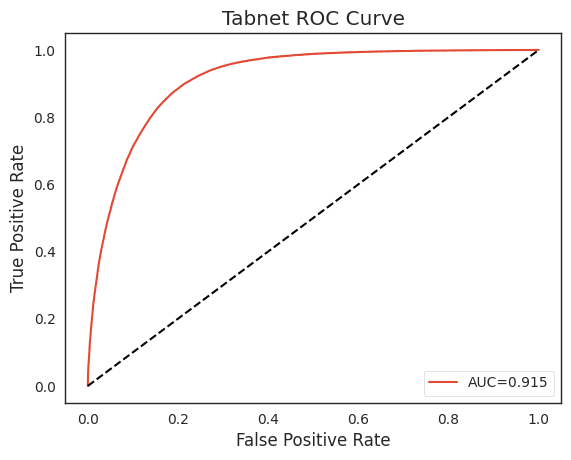

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# assume you have a trained classifier clf and test data X_test, y_test
y_score = tabnet.predict_proba(x_test_np)[:, 1] # get the probability of positive class
fpr, tpr, _ = roc_curve(y_test_np, y_score) # calculate FPR, TPR
roc_auc = auc(fpr, tpr) # calculate AUC

# plot ROC curve using matplotlib
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabnet ROC Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance for Tabnet

      Feature  Importance
57       D_65    0.391576
24   D_120_-1    0.329043
14    D_116_0    0.168815
93        P_4    0.028379
83       B_10    0.022918
94        R_6    0.019233
104      D_47    0.015455
48     D_68_5    0.008435
21    D_117_5    0.004619
4      B_38_2    0.004560


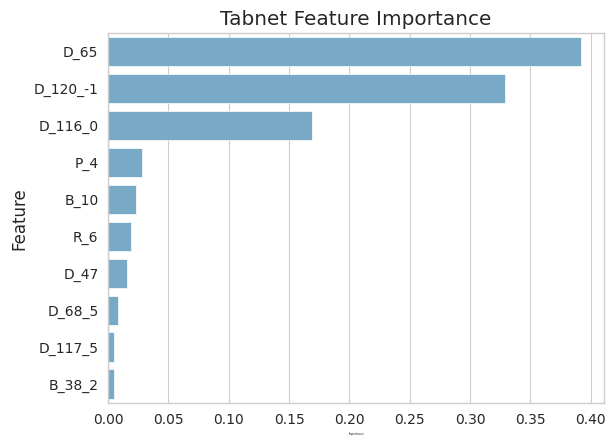

In [49]:
# import the color palette from Seaborn
from matplotlib import cm

# define the color
color = cm.Blues(0.5)

# get feature importances
importances = tabnet.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns,
                                    'Importance': importances})

# sort the features by importance score
feature_importances = feature_importances.sort_values(by='Importance',
                                                      ascending=False)

# display the top 10 features by importance score
print(feature_importances.head(10))

# plot the feature importances using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), color=color)
plt.title('Tabnet Feature Importance')
plt.xlabel('Importance', fontsize=2)
plt.show()

Shaply Plot for Tabnet

Permutation explainer: 201it [05:17,  1.59s/it]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


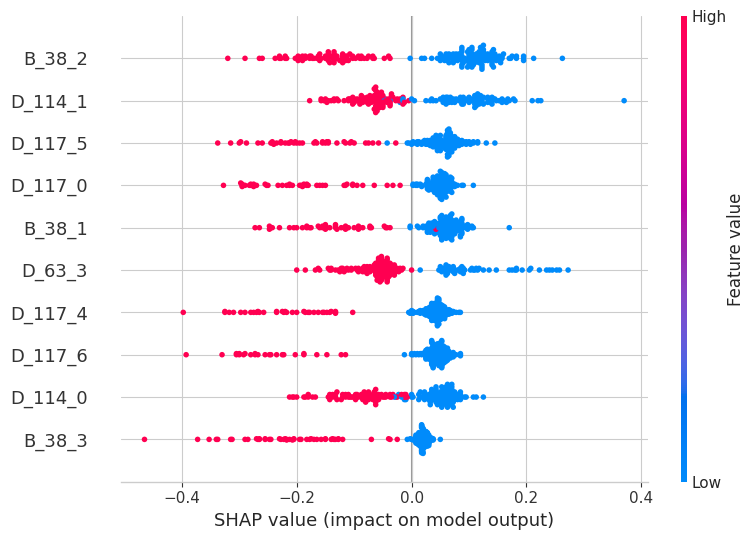

In [50]:
# sample 200 rows from x_test_hybrid randomly
sample_indices = np.random.choice(x_test_np.shape[0], size=200, replace=False)
x_test_sample = x_test_np[sample_indices]

explainer = shap.Explainer(tabnet.predict, x_test_sample)

sv = explainer(x_test_sample)
shap.summary_plot(sv, feature_names=x_train.columns, max_display=10)